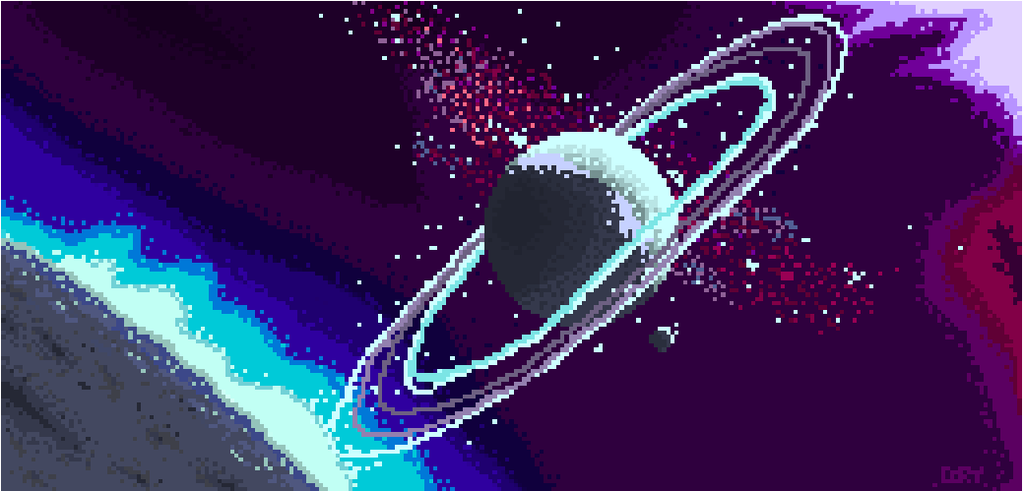

# Импортируем библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import scipy as sp
import statsmodels
import random as rd
import math
import statsmodels.api as sm
import seaborn as sns
!pip install openpyxl
import openpyxl
import itertools
from copy import copy, deepcopy
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.cluster import DBSCAN

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Вводим данные исследования

In [2]:
wb = openpyxl.load_workbook('students.xlsx')
sheet = wb.active

names = []
sex = []
year_study = []
ojectivity = []
intelligence_lvl = []
erudition_lvl = []
height_lvl = []
weight_lvl = []
beauty_lvl = []

for cell in sheet['B']:
    names.append(cell.value)
names = names[1:]

# 1 - Ж
# 0 - М
for cell in sheet['C']:
  if cell.value == 'Ж':
    sex.append(1)
  if cell.value == 'М':
    sex.append(0)

for cell in sheet['D']:
    year_study.append(cell.value)
year_study = year_study[1:]

for cell in sheet['I']:
    ojectivity.append(cell.value)
ojectivity = ojectivity[1:]

for cell in sheet['K']:
        intelligence_lvl.append(cell.value)
intelligence_lvl = intelligence_lvl[1:]

for cell in sheet['M']:
        erudition_lvl.append(cell.value)
erudition_lvl = erudition_lvl[1:]

for cell in sheet['O']:
        height_lvl.append(cell.value)
height_lvl = height_lvl[1:]

for cell in sheet['R']:
        weight_lvl.append(cell.value)
weight_lvl = weight_lvl[1:]

for cell in sheet['U']:
        beauty_lvl.append(cell.value)
beauty_lvl = beauty_lvl[1:]

df_main = pd.DataFrame({'sex': sex,'year_study': year_study, 'ojectivity': ojectivity,'intelligence_lvl': intelligence_lvl, 'erudition_lvl': erudition_lvl, 'height_lvl': height_lvl, 'weight_lvl': weight_lvl, 'beauty_lvl': beauty_lvl})
print(df_main)

    sex  year_study  ojectivity  ...  height_lvl  weight_lvl  beauty_lvl
0     1           3     0.70000  ...        0.80        0.70        0.85
1     0           3     0.85000  ...        0.80        0.70        0.50
2     1           1     0.70000  ...        0.40        0.60        0.50
3     1           1     0.30000  ...        0.26        0.50        0.50
4     0           2     0.73241  ...        0.50        0.50        0.75
..  ...         ...         ...  ...         ...         ...         ...
61    0           3     0.80000  ...        0.50        0.05        0.20
62    0           2     0.60000  ...        0.50        0.50        0.70
63    0           2     0.80000  ...        0.50        0.80        0.80
64    0           3     0.60000  ...        0.60        0.70        0.40
65    0           2     1.00000  ...        0.50        0.50        0.80

[66 rows x 8 columns]


Построим скаттеры для всех признаков

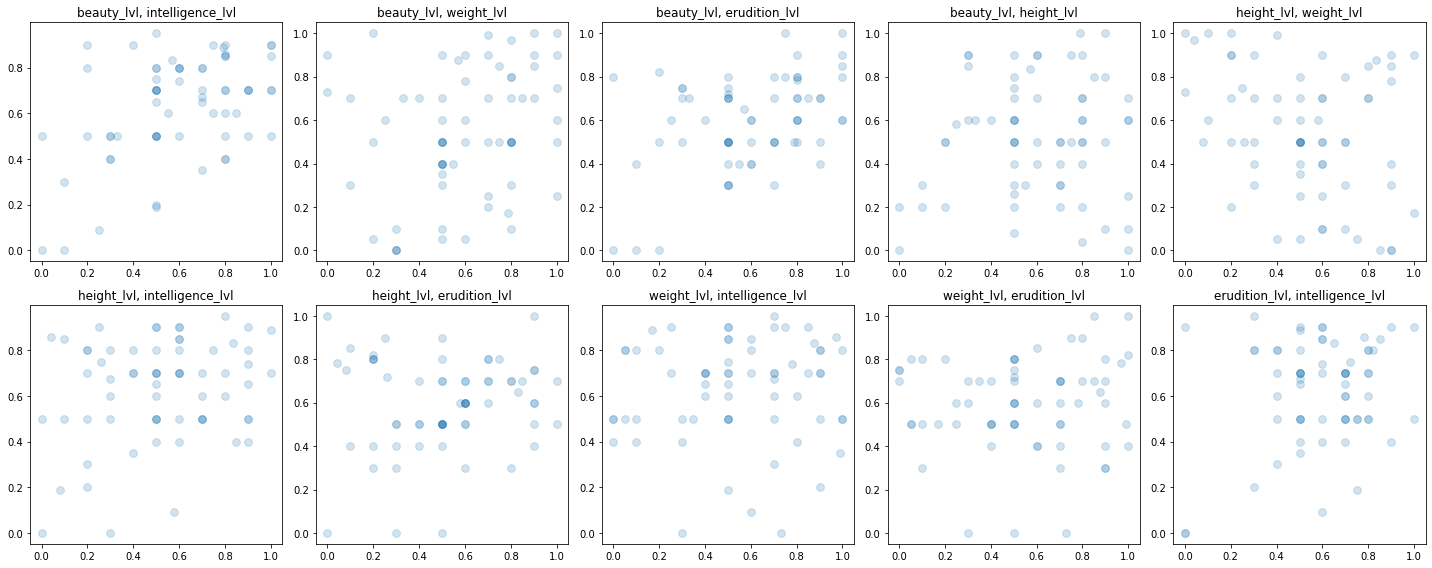

In [3]:
fig, axs = plt.subplots(2,5,figsize=(20,8))


axs[0,0].scatter(beauty_lvl, intelligence_lvl,s=60, alpha = 0.2)
axs[0,0].set_title("beauty_lvl, intelligence_lvl")
axs[0,1].scatter(beauty_lvl, weight_lvl,s=60, alpha = 0.2)
axs[0,1].set_title("beauty_lvl, weight_lvl")
axs[0,2].scatter(beauty_lvl, erudition_lvl,s=60, alpha = 0.2)
axs[0,2].set_title("beauty_lvl, erudition_lvl")
axs[0,3].scatter(beauty_lvl, height_lvl,s=60, alpha = 0.2)
axs[0,3].set_title("beauty_lvl, height_lvl")

axs[0,4].scatter(height_lvl, weight_lvl,s=60, alpha = 0.2)
axs[0,4].set_title("height_lvl, weight_lvl")
axs[1,0].scatter(height_lvl, intelligence_lvl,s=60, alpha = 0.2)
axs[1,0].set_title("height_lvl, intelligence_lvl")

axs[1,1].scatter(height_lvl, erudition_lvl,s=60, alpha = 0.2)
axs[1,1].set_title("height_lvl, erudition_lvl")
axs[1,2].scatter(weight_lvl, intelligence_lvl,s=60, alpha = 0.2)
axs[1,2].set_title("weight_lvl, intelligence_lvl")
axs[1,3].scatter(weight_lvl, erudition_lvl,s=60, alpha = 0.2)
axs[1,3].set_title("weight_lvl, erudition_lvl")

axs[1,4].scatter(erudition_lvl, intelligence_lvl,s=60, alpha = 0.2)
axs[1,4].set_title("erudition_lvl, intelligence_lvl")

fig.tight_layout()
plt.show()



# Kmeans

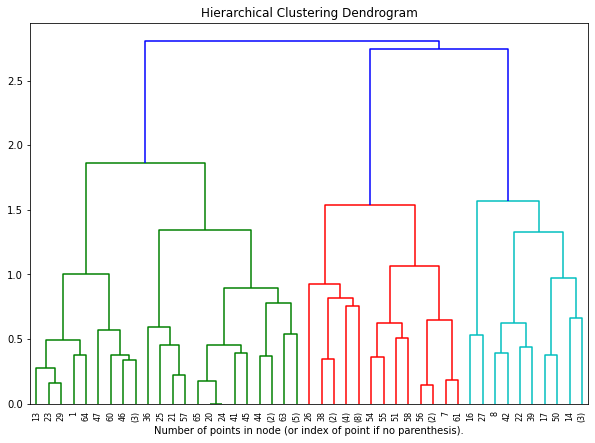

In [4]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    fig = plt.figure(figsize=(10,7))
    # Plot the corresponding dendrogram
    dnd = dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(np.array([beauty_lvl, intelligence_lvl,height_lvl, weight_lvl, erudition_lvl]).T)
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

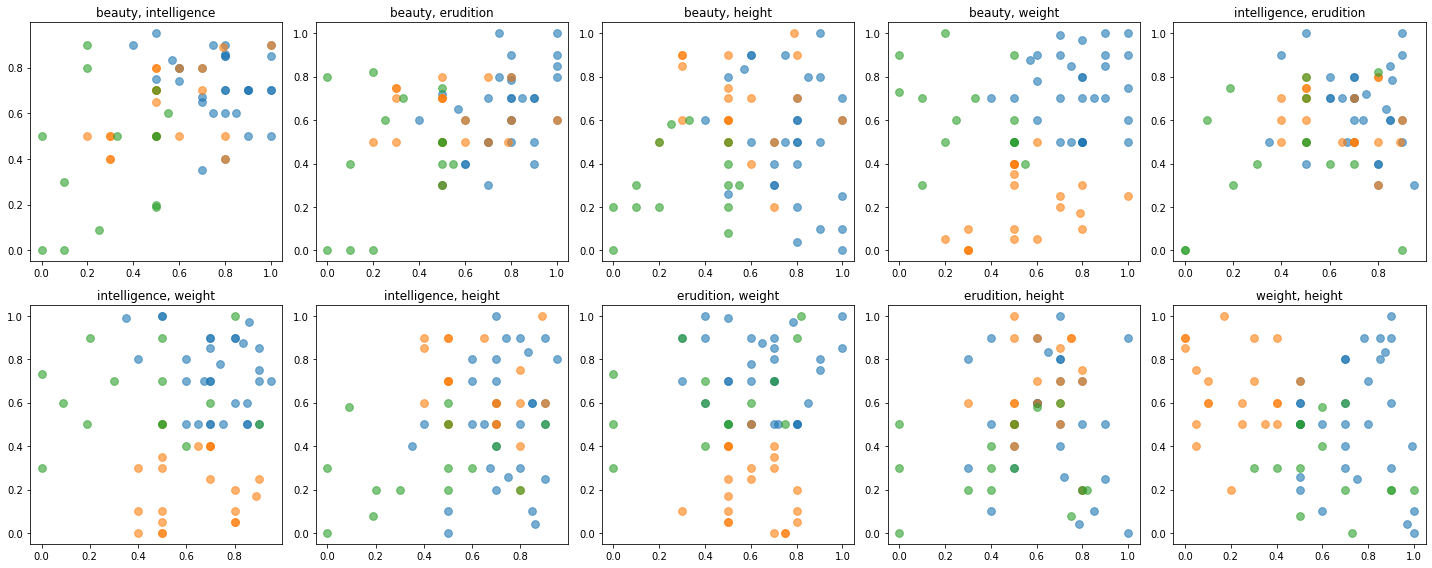

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [5]:
n = 3

kmeans = KMeans(n_clusters=n).fit(np.array([beauty_lvl, intelligence_lvl,height_lvl, weight_lvl, erudition_lvl]).T)
kmeans.labels_



fig, axs = plt.subplots(2,5,figsize=(20,8))

beauty = []
intelligence = []
plt.figure(figsize=(5,5))
for k in range(n):
  beauty.append([beauty_lvl[i] for i in range(len(beauty_lvl)) if kmeans.labels_[i] == k])
  intelligence.append([intelligence_lvl[i] for i in range(len(intelligence_lvl)) if kmeans.labels_[i] == k])
  axs[0,0].scatter(beauty[len(beauty)-1], intelligence[len(intelligence)-1], s=60, alpha = 0.6)
  axs[0,0].set_title('beauty, intelligence')


beauty = []
erudition = []
plt.figure(figsize=(5,5))
for k in range(n):
  beauty.append([beauty_lvl[i] for i in range(len(beauty_lvl)) if kmeans.labels_[i] == k])
  erudition.append([erudition_lvl[i] for i in range(len(erudition_lvl)) if kmeans.labels_[i] == k])
  axs[0,1].scatter(beauty[len(beauty)-1], erudition[len(erudition)-1], s=60, alpha = 0.6)
  axs[0,1].set_title('beauty, erudition')


beauty = []
height = []
plt.figure(figsize=(5,5))
for k in range(n):
  beauty.append([beauty_lvl[i] for i in range(len(beauty_lvl)) if kmeans.labels_[i] == k])
  height.append([height_lvl[i] for i in range(len(height_lvl)) if kmeans.labels_[i] == k])
  axs[0,2].scatter(beauty[len(beauty)-1], height[len(height)-1], s=60, alpha = 0.6)
  axs[0,2].set_title('beauty, height')


beauty = []
weight = []
plt.figure(figsize=(5,5))
for k in range(n):
  beauty.append([beauty_lvl[i] for i in range(len(beauty_lvl)) if kmeans.labels_[i] == k])
  weight.append([weight_lvl[i] for i in range(len(weight_lvl)) if kmeans.labels_[i] == k])
  axs[0,3].scatter(beauty[len(beauty)-1], weight[len(weight)-1], s=60, alpha = 0.6)
  axs[0,3].set_title('beauty, weight')


intelligence = []
erudition = []
plt.figure(figsize=(5,5))
for k in range(n):
  intelligence.append([intelligence_lvl[i] for i in range(len(intelligence_lvl)) if kmeans.labels_[i] == k])
  erudition.append([erudition_lvl[i] for i in range(len(erudition_lvl)) if kmeans.labels_[i] == k])
  axs[0,4].scatter(intelligence[len(intelligence)-1], erudition[len(erudition)-1], s=60, alpha = 0.6)
  axs[0,4].set_title('intelligence, erudition')

intelligence = []
weight = []
plt.figure(figsize=(5,5))
for k in range(n):
  intelligence.append([intelligence_lvl[i] for i in range(len(intelligence_lvl)) if kmeans.labels_[i] == k])
  weight.append([weight_lvl[i] for i in range(len(weight_lvl)) if kmeans.labels_[i] == k])
  axs[1,0].scatter(intelligence[len(intelligence)-1], weight[len(weight)-1], s=60, alpha = 0.6)
  axs[1,0].set_title('intelligence, weight')

intelligence = []
height = []
plt.figure(figsize=(5,5))
for k in range(n):
  intelligence.append([intelligence_lvl[i] for i in range(len(intelligence_lvl)) if kmeans.labels_[i] == k])
  height.append([height_lvl[i] for i in range(len(height_lvl)) if kmeans.labels_[i] == k])
  axs[1,1].scatter(intelligence[len(intelligence)-1], height[len(height)-1], s=60, alpha = 0.6)
  axs[1,1].set_title('intelligence, height')


erudition = []
weight = []
plt.figure(figsize=(5,5))
for k in range(n):
  erudition.append([erudition_lvl[i] for i in range(len(erudition_lvl)) if kmeans.labels_[i] == k])
  weight.append([weight_lvl[i] for i in range(len(weight_lvl)) if kmeans.labels_[i] == k])
  axs[1,2].scatter(erudition[len(erudition)-1], weight[len(weight)-1], s=60, alpha = 0.6)
  axs[1,2].set_title('erudition, weight')


erudition = []
height = []
plt.figure(figsize=(5,5))
for k in range(n):
  erudition.append([erudition_lvl[i] for i in range(len(erudition_lvl)) if kmeans.labels_[i] == k])
  height.append([height_lvl[i] for i in range(len(height_lvl)) if kmeans.labels_[i] == k])
  axs[1,3].scatter(erudition[len(erudition)-1], height[len(height)-1], s=60, alpha = 0.6)
  axs[1,3].set_title('erudition, height')


weight = []
height = []
plt.figure(figsize=(5,5))
for k in range(n):
  weight.append([weight_lvl[i] for i in range(len(weight_lvl)) if kmeans.labels_[i] == k])
  height.append([height_lvl[i] for i in range(len(height_lvl)) if kmeans.labels_[i] == k])
  axs[1,4].scatter(weight[len(weight)-1], height[len(height)-1], s=60, alpha = 0.6)
  axs[1,4].set_title('weight, height')

fig.tight_layout()
plt.show()

# Spectral Clustering

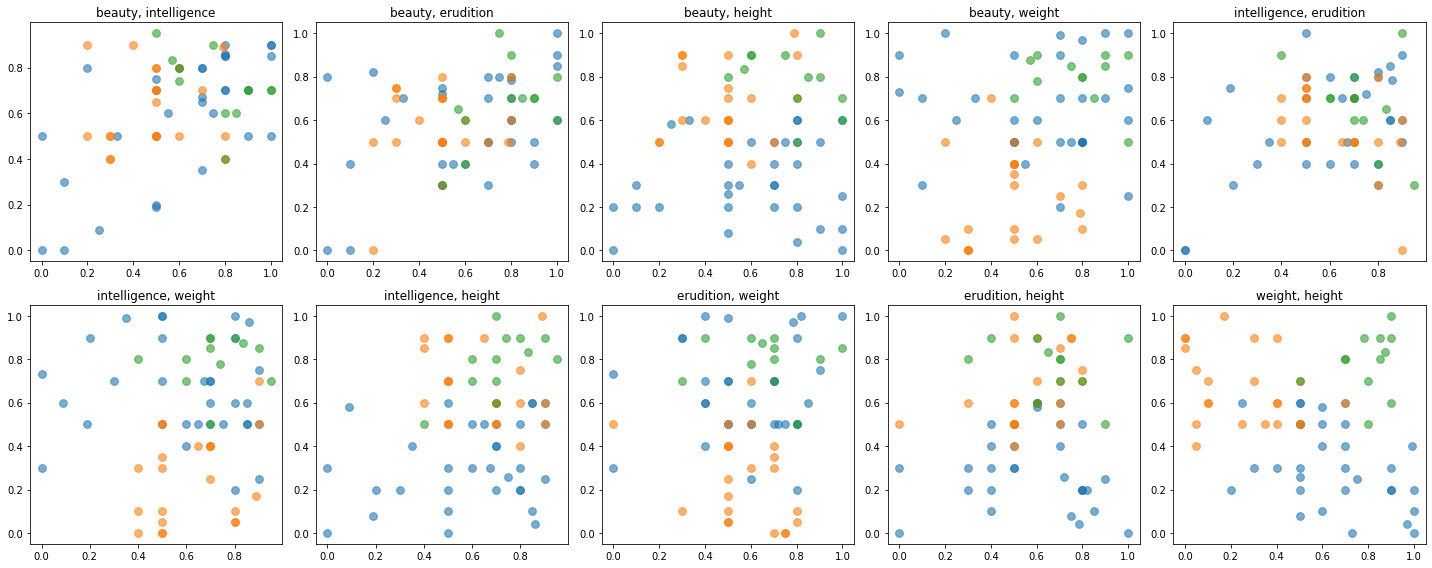

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [6]:
n = 3
clustering = SpectralClustering(n_clusters=n,assign_labels="kmeans",affinity='nearest_neighbors').fit(np.array([beauty_lvl, intelligence_lvl,height_lvl, weight_lvl, erudition_lvl]).T)
clustering.labels_


fig, axs = plt.subplots(2,5,figsize=(20,8))

beauty = []
intelligence = []
plt.figure(figsize=(5,5))
for k in range(n):
  beauty.append([beauty_lvl[i] for i in range(len(beauty_lvl)) if clustering.labels_[i] == k])
  intelligence.append([intelligence_lvl[i] for i in range(len(intelligence_lvl)) if clustering.labels_[i] == k])
  axs[0,0].scatter(beauty[len(beauty)-1], intelligence[len(intelligence)-1], s=60, alpha = 0.6)
  axs[0,0].set_title('beauty, intelligence')


beauty = []
erudition = []
plt.figure(figsize=(5,5))
for k in range(n):
  beauty.append([beauty_lvl[i] for i in range(len(beauty_lvl)) if clustering.labels_[i] == k])
  erudition.append([erudition_lvl[i] for i in range(len(erudition_lvl)) if clustering.labels_[i] == k])
  axs[0,1].scatter(beauty[len(beauty)-1], erudition[len(erudition)-1], s=60, alpha = 0.6)
  axs[0,1].set_title('beauty, erudition')


beauty = []
height = []
plt.figure(figsize=(5,5))
for k in range(n):
  beauty.append([beauty_lvl[i] for i in range(len(beauty_lvl)) if clustering.labels_[i] == k])
  height.append([height_lvl[i] for i in range(len(height_lvl)) if clustering.labels_[i] == k])
  axs[0,2].scatter(beauty[len(beauty)-1], height[len(height)-1], s=60, alpha = 0.6)
  axs[0,2].set_title('beauty, height')


beauty = []
weight = []
plt.figure(figsize=(5,5))
for k in range(n):
  beauty.append([beauty_lvl[i] for i in range(len(beauty_lvl)) if clustering.labels_[i] == k])
  weight.append([weight_lvl[i] for i in range(len(weight_lvl)) if clustering.labels_[i] == k])
  axs[0,3].scatter(beauty[len(beauty)-1], weight[len(weight)-1], s=60, alpha = 0.6)
  axs[0,3].set_title('beauty, weight')


intelligence = []
erudition = []
plt.figure(figsize=(5,5))
for k in range(n):
  intelligence.append([intelligence_lvl[i] for i in range(len(intelligence_lvl)) if clustering.labels_[i] == k])
  erudition.append([erudition_lvl[i] for i in range(len(erudition_lvl)) if clustering.labels_[i] == k])
  axs[0,4].scatter(intelligence[len(intelligence)-1], erudition[len(erudition)-1], s=60, alpha = 0.6)
  axs[0,4].set_title('intelligence, erudition')

intelligence = []
weight = []
plt.figure(figsize=(5,5))
for k in range(n):
  intelligence.append([intelligence_lvl[i] for i in range(len(intelligence_lvl)) if clustering.labels_[i] == k])
  weight.append([weight_lvl[i] for i in range(len(weight_lvl)) if clustering.labels_[i] == k])
  axs[1,0].scatter(intelligence[len(intelligence)-1], weight[len(weight)-1], s=60, alpha = 0.6)
  axs[1,0].set_title('intelligence, weight')

intelligence = []
height = []
plt.figure(figsize=(5,5))
for k in range(n):
  intelligence.append([intelligence_lvl[i] for i in range(len(intelligence_lvl)) if clustering.labels_[i] == k])
  height.append([height_lvl[i] for i in range(len(height_lvl)) if clustering.labels_[i] == k])
  axs[1,1].scatter(intelligence[len(intelligence)-1], height[len(height)-1], s=60, alpha = 0.6)
  axs[1,1].set_title('intelligence, height')


erudition = []
weight = []
plt.figure(figsize=(5,5))
for k in range(n):
  erudition.append([erudition_lvl[i] for i in range(len(erudition_lvl)) if clustering.labels_[i] == k])
  weight.append([weight_lvl[i] for i in range(len(weight_lvl)) if clustering.labels_[i] == k])
  axs[1,2].scatter(erudition[len(erudition)-1], weight[len(weight)-1], s=60, alpha = 0.6)
  axs[1,2].set_title('erudition, weight')


erudition = []
height = []
plt.figure(figsize=(5,5))
for k in range(n):
  erudition.append([erudition_lvl[i] for i in range(len(erudition_lvl)) if clustering.labels_[i] == k])
  height.append([height_lvl[i] for i in range(len(height_lvl)) if clustering.labels_[i] == k])
  axs[1,3].scatter(erudition[len(erudition)-1], height[len(height)-1], s=60, alpha = 0.6)
  axs[1,3].set_title('erudition, height')


weight = []
height = []
plt.figure(figsize=(5,5))
for k in range(n):
  weight.append([weight_lvl[i] for i in range(len(weight_lvl)) if clustering.labels_[i] == k])
  height.append([height_lvl[i] for i in range(len(height_lvl)) if clustering.labels_[i] == k])
  axs[1,4].scatter(weight[len(weight)-1], height[len(height)-1], s=60, alpha = 0.6)
  axs[1,4].set_title('weight, height')

fig.tight_layout()
plt.show()

# Optics

No handles with labels found to put in legend.


[ 0 -1  1  1  1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1  0  1  1  1 -1 -1
  1 -1 -1 -1 -1  0  1  0  1  1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1  0  0 -1
  1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1  0 -1  1 -1  1  1]


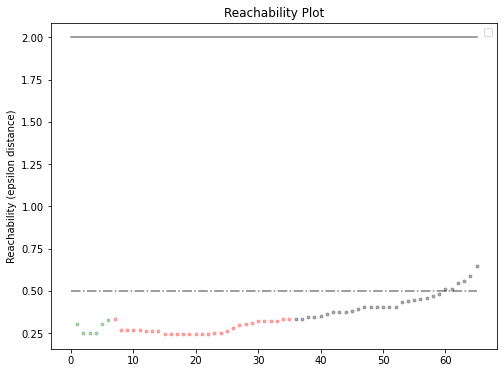

In [7]:
opt = OPTICS(min_samples=5, xi=0.00, min_cluster_size=.000000001).fit(np.array([beauty_lvl, intelligence_lvl,height_lvl, weight_lvl, erudition_lvl]).T)
print(opt.labels_)

space = np.arange(len(beauty_lvl))
reachability = opt.reachability_[opt.ordering_]
labels = opt.labels_[opt.ordering_]

# Reachability plot
plt.figure(figsize=(8,6))
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    plt.plot(Xk, Rk, color, alpha=0.3)
plt.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
plt.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
plt.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
plt.ylabel('Reachability (epsilon distance)')
plt.title('Reachability Plot')
plt.legend()

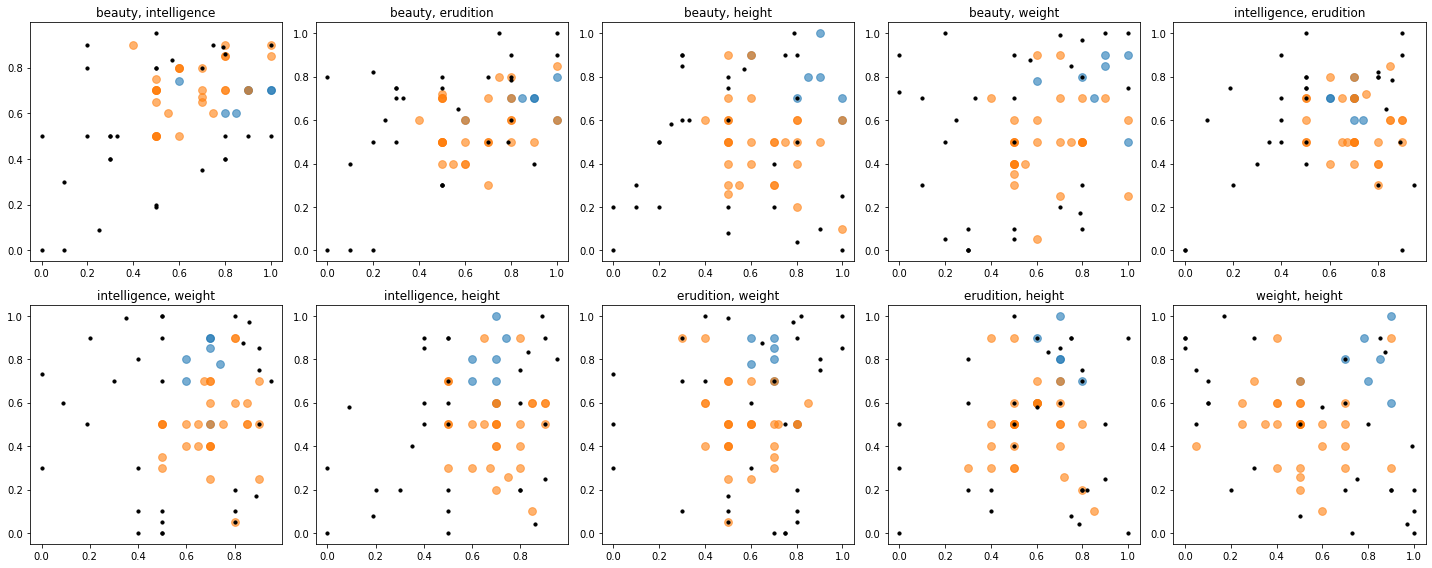

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [8]:
n = 2

fig, axs = plt.subplots(2,5,figsize=(20,8))

beauty = []
intelligence = []
plt.figure(figsize=(5,5))
for k in range(n):
  beauty.append([beauty_lvl[i] for i in range(len(beauty_lvl)) if opt.labels_[i] == k])
  intelligence.append([intelligence_lvl[i] for i in range(len(intelligence_lvl)) if opt.labels_[i] == k])
  axs[0,0].scatter(beauty[len(beauty)-1], intelligence[len(intelligence)-1], s=60, alpha = 0.6)
  axs[0,0].set_title('beauty, intelligence')
noise_beauty = [beauty_lvl[i] for i in range(len(beauty_lvl)) if opt.labels_[i] == -1]
noise_intelligence = [intelligence_lvl[i] for i in range(len(intelligence_lvl)) if opt.labels_[i] == -1]
axs[0,0].scatter(noise_beauty, noise_intelligence, s = 10, c='black')

beauty = []
erudition = []
plt.figure(figsize=(5,5))
for k in range(n):
  beauty.append([beauty_lvl[i] for i in range(len(beauty_lvl)) if opt.labels_[i] == k])
  erudition.append([erudition_lvl[i] for i in range(len(erudition_lvl)) if opt.labels_[i] == k])
  axs[0,1].scatter(beauty[len(beauty)-1], erudition[len(erudition)-1], s=60, alpha = 0.6)
  axs[0,1].set_title('beauty, erudition')
noise_beauty = [beauty_lvl[i] for i in range(len(beauty_lvl)) if opt.labels_[i] == -1]
noise_erudition = [erudition_lvl[i] for i in range(len(erudition_lvl)) if opt.labels_[i] == -1]
axs[0,1].scatter(noise_beauty, noise_erudition, s = 10, c='black')


beauty = []
height = []
plt.figure(figsize=(5,5))
for k in range(n):
  beauty.append([beauty_lvl[i] for i in range(len(beauty_lvl)) if opt.labels_[i] == k])
  height.append([height_lvl[i] for i in range(len(height_lvl)) if opt.labels_[i] == k])
  axs[0,2].scatter(beauty[len(beauty)-1], height[len(height)-1], s=60, alpha = 0.6)
  axs[0,2].set_title('beauty, height')
noise_beauty = [beauty_lvl[i] for i in range(len(beauty_lvl)) if opt.labels_[i] == -1]
noise_height = [height_lvl[i] for i in range(len(height_lvl)) if opt.labels_[i] == -1]
axs[0,2].scatter(noise_beauty, noise_height, s = 10, c='black')


beauty = []
weight = []
plt.figure(figsize=(5,5))
for k in range(n):
  beauty.append([beauty_lvl[i] for i in range(len(beauty_lvl)) if opt.labels_[i] == k])
  weight.append([weight_lvl[i] for i in range(len(weight_lvl)) if opt.labels_[i] == k])
  axs[0,3].scatter(beauty[len(beauty)-1], weight[len(weight)-1], s=60, alpha = 0.6)
  axs[0,3].set_title('beauty, weight')
noise_beauty = [beauty_lvl[i] for i in range(len(beauty_lvl)) if opt.labels_[i] == -1]
noise_weight = [weight_lvl[i] for i in range(len(weight_lvl)) if opt.labels_[i] == -1]
axs[0,3].scatter(noise_beauty, noise_weight, s = 10, c='black')


intelligence = []
erudition = []
plt.figure(figsize=(5,5))
for k in range(n):
  intelligence.append([intelligence_lvl[i] for i in range(len(intelligence_lvl)) if opt.labels_[i] == k])
  erudition.append([erudition_lvl[i] for i in range(len(erudition_lvl)) if opt.labels_[i] == k])
  axs[0,4].scatter(intelligence[len(intelligence)-1], erudition[len(erudition)-1], s=60, alpha = 0.6)
  axs[0,4].set_title('intelligence, erudition')
noise_intelligence = [intelligence_lvl[i] for i in range(len(intelligence_lvl)) if opt.labels_[i] == -1]
noise_erudition = [erudition_lvl[i] for i in range(len(erudition_lvl)) if opt.labels_[i] == -1]
axs[0,4].scatter(noise_intelligence, noise_erudition, s = 10, c='black')

intelligence = []
weight = []
plt.figure(figsize=(5,5))
for k in range(n):
  intelligence.append([intelligence_lvl[i] for i in range(len(intelligence_lvl)) if opt.labels_[i] == k])
  weight.append([weight_lvl[i] for i in range(len(weight_lvl)) if opt.labels_[i] == k])
  axs[1,0].scatter(intelligence[len(intelligence)-1], weight[len(weight)-1], s=60, alpha = 0.6)
  axs[1,0].set_title('intelligence, weight')
noise_intelligence = [intelligence_lvl[i] for i in range(len(intelligence_lvl)) if opt.labels_[i] == -1]
noise_weight = [weight_lvl[i] for i in range(len(weight_lvl)) if opt.labels_[i] == -1]
axs[1,0].scatter(noise_intelligence, noise_weight, s = 10, c='black')

intelligence = []
height = []
plt.figure(figsize=(5,5))
for k in range(n):
  intelligence.append([intelligence_lvl[i] for i in range(len(intelligence_lvl)) if opt.labels_[i] == k])
  height.append([height_lvl[i] for i in range(len(height_lvl)) if opt.labels_[i] == k])
  axs[1,1].scatter(intelligence[len(intelligence)-1], height[len(height)-1], s=60, alpha = 0.6)
  axs[1,1].set_title('intelligence, height')
noise_intelligence = [intelligence_lvl[i] for i in range(len(intelligence_lvl)) if opt.labels_[i] == -1]
noise_height = [height_lvl[i] for i in range(len(height_lvl)) if opt.labels_[i] == -1]
axs[1,1].scatter(noise_intelligence, noise_height, s = 10, c='black')


erudition = []
weight = []
plt.figure(figsize=(5,5))
for k in range(n):
  erudition.append([erudition_lvl[i] for i in range(len(erudition_lvl)) if opt.labels_[i] == k])
  weight.append([weight_lvl[i] for i in range(len(weight_lvl)) if opt.labels_[i] == k])
  axs[1,2].scatter(erudition[len(erudition)-1], weight[len(weight)-1], s=60, alpha = 0.6)
  axs[1,2].set_title('erudition, weight')
noise_erudition = [erudition_lvl[i] for i in range(len(erudition_lvl)) if opt.labels_[i] == -1]
noise_weight = [weight_lvl[i] for i in range(len(weight_lvl)) if opt.labels_[i] == -1]
axs[1,2].scatter(noise_erudition, noise_weight, s = 10, c='black')


erudition = []
height = []
plt.figure(figsize=(5,5))
for k in range(n):
  erudition.append([erudition_lvl[i] for i in range(len(erudition_lvl)) if opt.labels_[i] == k])
  height.append([height_lvl[i] for i in range(len(height_lvl)) if opt.labels_[i] == k])
  axs[1,3].scatter(erudition[len(erudition)-1], height[len(height)-1], s=60, alpha = 0.6)
  axs[1,3].set_title('erudition, height')
noise_erudition = [erudition_lvl[i] for i in range(len(erudition_lvl)) if opt.labels_[i] == -1]
noise_height = [height_lvl[i] for i in range(len(height_lvl)) if opt.labels_[i] == -1]
axs[1,3].scatter(noise_erudition, noise_height, s = 10, c='black')


weight = []
height = []
plt.figure(figsize=(5,5))
for k in range(n):
  weight.append([weight_lvl[i] for i in range(len(weight_lvl)) if opt.labels_[i] == k])
  height.append([height_lvl[i] for i in range(len(height_lvl)) if opt.labels_[i] == k])
  axs[1,4].scatter(weight[len(weight)-1], height[len(height)-1], s=60, alpha = 0.6)
  axs[1,4].set_title('weight, height')
noise_weight = [weight_lvl[i] for i in range(len(weight_lvl)) if opt.labels_[i] == -1]
noise_height = [height_lvl[i] for i in range(len(height_lvl)) if opt.labels_[i] == -1]
axs[1,4].scatter(noise_weight, noise_height, s = 10, c='black')

fig.tight_layout()
plt.show()

# DBScan

In [9]:
dbscan = DBSCAN(eps=0.331, min_samples=5).fit(np.array([beauty_lvl, intelligence_lvl,height_lvl, weight_lvl, erudition_lvl]).T)
dbscan.labels_

array([ 0, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1,  0,  1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  0,  1,  0,  1,  1,
       -1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  0,  0, -1,  1,  1, -1,
       -1,  1,  1, -1, -1, -1, -1, -1,  1,  0, -1,  1, -1, -1,  1])

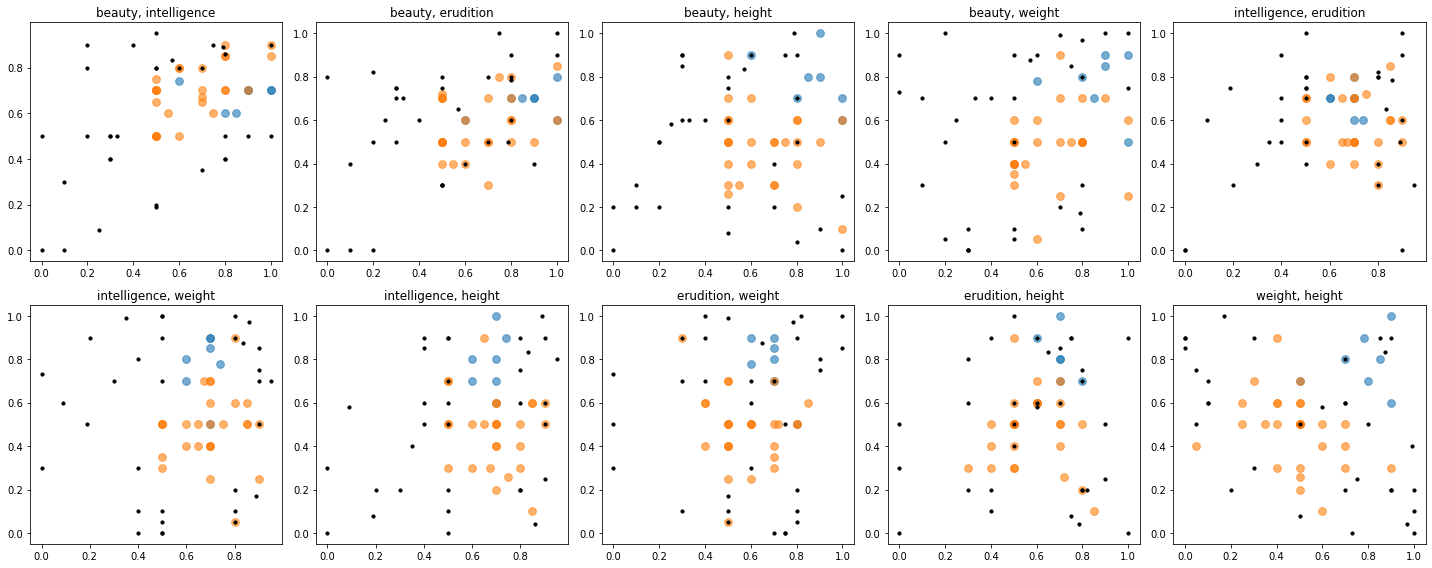

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [10]:
n = 3

fig, axs = plt.subplots(2,5,figsize=(20,8))

beauty = []
intelligence = []
plt.figure(figsize=(5,5))
for k in range(n):
  beauty.append([beauty_lvl[i] for i in range(len(beauty_lvl)) if dbscan.labels_[i] == k])
  intelligence.append([intelligence_lvl[i] for i in range(len(intelligence_lvl)) if dbscan.labels_[i] == k])
  axs[0,0].scatter(beauty[len(beauty)-1], intelligence[len(intelligence)-1], s=60, alpha = 0.6)
  axs[0,0].set_title('beauty, intelligence')
noise_beauty = [beauty_lvl[i] for i in range(len(beauty_lvl)) if dbscan.labels_[i] == -1]
noise_intelligence = [intelligence_lvl[i] for i in range(len(intelligence_lvl)) if dbscan.labels_[i] == -1]
axs[0,0].scatter(noise_beauty, noise_intelligence, s = 10, c='black')

beauty = []
erudition = []
plt.figure(figsize=(5,5))
for k in range(n):
  beauty.append([beauty_lvl[i] for i in range(len(beauty_lvl)) if dbscan.labels_[i] == k])
  erudition.append([erudition_lvl[i] for i in range(len(erudition_lvl)) if dbscan.labels_[i] == k])
  axs[0,1].scatter(beauty[len(beauty)-1], erudition[len(erudition)-1], s=60, alpha = 0.6)
  axs[0,1].set_title('beauty, erudition')
noise_beauty = [beauty_lvl[i] for i in range(len(beauty_lvl)) if dbscan.labels_[i] == -1]
noise_erudition = [erudition_lvl[i] for i in range(len(erudition_lvl)) if dbscan.labels_[i] == -1]
axs[0,1].scatter(noise_beauty, noise_erudition, s = 10, c='black')


beauty = []
height = []
plt.figure(figsize=(5,5))
for k in range(n):
  beauty.append([beauty_lvl[i] for i in range(len(beauty_lvl)) if dbscan.labels_[i] == k])
  height.append([height_lvl[i] for i in range(len(height_lvl)) if dbscan.labels_[i] == k])
  axs[0,2].scatter(beauty[len(beauty)-1], height[len(height)-1], s=60, alpha = 0.6)
  axs[0,2].set_title('beauty, height')
noise_beauty = [beauty_lvl[i] for i in range(len(beauty_lvl)) if dbscan.labels_[i] == -1]
noise_height = [height_lvl[i] for i in range(len(height_lvl)) if dbscan.labels_[i] == -1]
axs[0,2].scatter(noise_beauty, noise_height, s = 10, c='black')


beauty = []
weight = []
plt.figure(figsize=(5,5))
for k in range(n):
  beauty.append([beauty_lvl[i] for i in range(len(beauty_lvl)) if dbscan.labels_[i] == k])
  weight.append([weight_lvl[i] for i in range(len(weight_lvl)) if dbscan.labels_[i] == k])
  axs[0,3].scatter(beauty[len(beauty)-1], weight[len(weight)-1], s=60, alpha = 0.6)
  axs[0,3].set_title('beauty, weight')
noise_beauty = [beauty_lvl[i] for i in range(len(beauty_lvl)) if dbscan.labels_[i] == -1]
noise_weight = [weight_lvl[i] for i in range(len(weight_lvl)) if dbscan.labels_[i] == -1]
axs[0,3].scatter(noise_beauty, noise_weight, s = 10, c='black')


intelligence = []
erudition = []
plt.figure(figsize=(5,5))
for k in range(n):
  intelligence.append([intelligence_lvl[i] for i in range(len(intelligence_lvl)) if dbscan.labels_[i] == k])
  erudition.append([erudition_lvl[i] for i in range(len(erudition_lvl)) if dbscan.labels_[i] == k])
  axs[0,4].scatter(intelligence[len(intelligence)-1], erudition[len(erudition)-1], s=60, alpha = 0.6)
  axs[0,4].set_title('intelligence, erudition')
noise_intelligence = [intelligence_lvl[i] for i in range(len(intelligence_lvl)) if dbscan.labels_[i] == -1]
noise_erudition = [erudition_lvl[i] for i in range(len(erudition_lvl)) if dbscan.labels_[i] == -1]
axs[0,4].scatter(noise_intelligence, noise_erudition, s = 10, c='black')

intelligence = []
weight = []
plt.figure(figsize=(5,5))
for k in range(n):
  intelligence.append([intelligence_lvl[i] for i in range(len(intelligence_lvl)) if dbscan.labels_[i] == k])
  weight.append([weight_lvl[i] for i in range(len(weight_lvl)) if dbscan.labels_[i] == k])
  axs[1,0].scatter(intelligence[len(intelligence)-1], weight[len(weight)-1], s=60, alpha = 0.6)
  axs[1,0].set_title('intelligence, weight')
noise_intelligence = [intelligence_lvl[i] for i in range(len(intelligence_lvl)) if dbscan.labels_[i] == -1]
noise_weight = [weight_lvl[i] for i in range(len(weight_lvl)) if dbscan.labels_[i] == -1]
axs[1,0].scatter(noise_intelligence, noise_weight, s = 10, c='black')

intelligence = []
height = []
plt.figure(figsize=(5,5))
for k in range(n):
  intelligence.append([intelligence_lvl[i] for i in range(len(intelligence_lvl)) if dbscan.labels_[i] == k])
  height.append([height_lvl[i] for i in range(len(height_lvl)) if dbscan.labels_[i] == k])
  axs[1,1].scatter(intelligence[len(intelligence)-1], height[len(height)-1], s=60, alpha = 0.6)
  axs[1,1].set_title('intelligence, height')
noise_intelligence = [intelligence_lvl[i] for i in range(len(intelligence_lvl)) if dbscan.labels_[i] == -1]
noise_height = [height_lvl[i] for i in range(len(height_lvl)) if dbscan.labels_[i] == -1]
axs[1,1].scatter(noise_intelligence, noise_height, s = 10, c='black')


erudition = []
weight = []
plt.figure(figsize=(5,5))
for k in range(n):
  erudition.append([erudition_lvl[i] for i in range(len(erudition_lvl)) if dbscan.labels_[i] == k])
  weight.append([weight_lvl[i] for i in range(len(weight_lvl)) if dbscan.labels_[i] == k])
  axs[1,2].scatter(erudition[len(erudition)-1], weight[len(weight)-1], s=60, alpha = 0.6)
  axs[1,2].set_title('erudition, weight')
noise_erudition = [erudition_lvl[i] for i in range(len(erudition_lvl)) if dbscan.labels_[i] == -1]
noise_weight = [weight_lvl[i] for i in range(len(weight_lvl)) if dbscan.labels_[i] == -1]
axs[1,2].scatter(noise_erudition, noise_weight, s = 10, c='black')


erudition = []
height = []
plt.figure(figsize=(5,5))
for k in range(n):
  erudition.append([erudition_lvl[i] for i in range(len(erudition_lvl)) if dbscan.labels_[i] == k])
  height.append([height_lvl[i] for i in range(len(height_lvl)) if dbscan.labels_[i] == k])
  axs[1,3].scatter(erudition[len(erudition)-1], height[len(height)-1], s=60, alpha = 0.6)
  axs[1,3].set_title('erudition, height')
noise_erudition = [erudition_lvl[i] for i in range(len(erudition_lvl)) if dbscan.labels_[i] == -1]
noise_height = [height_lvl[i] for i in range(len(height_lvl)) if dbscan.labels_[i] == -1]
axs[1,3].scatter(noise_erudition, noise_height, s = 10, c='black')


weight = []
height = []
plt.figure(figsize=(5,5))
for k in range(n):
  weight.append([weight_lvl[i] for i in range(len(weight_lvl)) if dbscan.labels_[i] == k])
  height.append([height_lvl[i] for i in range(len(height_lvl)) if dbscan.labels_[i] == k])
  axs[1,4].scatter(weight[len(weight)-1], height[len(height)-1], s=60, alpha = 0.6)
  axs[1,4].set_title('weight, height')
noise_weight = [weight_lvl[i] for i in range(len(weight_lvl)) if dbscan.labels_[i] == -1]
noise_height = [height_lvl[i] for i in range(len(height_lvl)) if dbscan.labels_[i] == -1]
axs[1,4].scatter(noise_weight, noise_height, s = 10, c='black')

fig.tight_layout()
plt.show()

# Выделяем главные компоненты

In [11]:
from sklearn.preprocessing import StandardScaler
features = ['intelligence_lvl', 'erudition_lvl', 'height_lvl', 'weight_lvl', 'beauty_lvl']
x = df_main.loc[:, features].values
x = StandardScaler().fit_transform(x)
print(x)

[[-0.12092115  0.50479844  1.06235069  0.5414653   0.97482467]
 [ 1.45556937 -1.39169776  1.06235069  0.5414653  -0.38499332]
 [ 0.32950472 -0.91757371 -0.45721179  0.19568194 -0.38499332]
 [ 0.55471765  0.59962325 -0.98905866 -0.15010141 -0.38499332]
 [-0.12092115  0.97892249 -0.07732117 -0.15010141  0.58630525]
 [ 0.32950472 -0.44344966  0.30256945 -0.49588476 -0.38499332]
 [-0.12092115 -0.91757371 -0.83710241 -0.49588476 -0.1907336 ]
 [-1.02177287 -0.44344966  0.30256945 -1.53323483 -1.16203217]
 [-1.2469858  -0.44344966 -0.45721179  1.54423703  0.39204553]
 [ 0.32950472  0.50479844 -0.45721179  0.5414653   0.78056496]
 [ 0.32950472  0.97892249 -1.21699303 -0.15010141  0.78056496]
 [ 0.32950472 -0.44344966 -0.07732117 -1.0145598   0.39204553]
 [ 0.20338548 -0.44344966 -0.83710241  0.5414653   0.39204553]
 [ 0.77993058 -0.91757371  1.44224131  1.23303201  0.00352611]
 [-1.97892783  0.74186047 -1.67286177 -0.15010141 -0.38499332]
 [-0.57134701  0.74186047  1.44224131 -1.87901818 -1.16

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3' ])

In [13]:
print(principalDf)

    principal component 1  principal component 2  principal component 3
0               -1.109804              -0.169973              -0.135139
1               -0.191787              -0.646087               2.161352
2                0.573378               0.324058               0.874455
3               -0.117787               0.440848              -0.371631
4               -0.736221               0.073904              -0.870813
..                    ...                    ...                    ...
61               1.807037              -1.301569              -0.469326
62              -0.505691               0.002046              -0.382506
63              -0.778811               0.970413              -1.440928
64              -0.360362              -0.126957               0.798393
65              -0.896968              -0.122183               0.977032

[66 rows x 3 columns]


In [14]:
pca.explained_variance_ratio_

array([0.36563754, 0.26713765, 0.16126662])

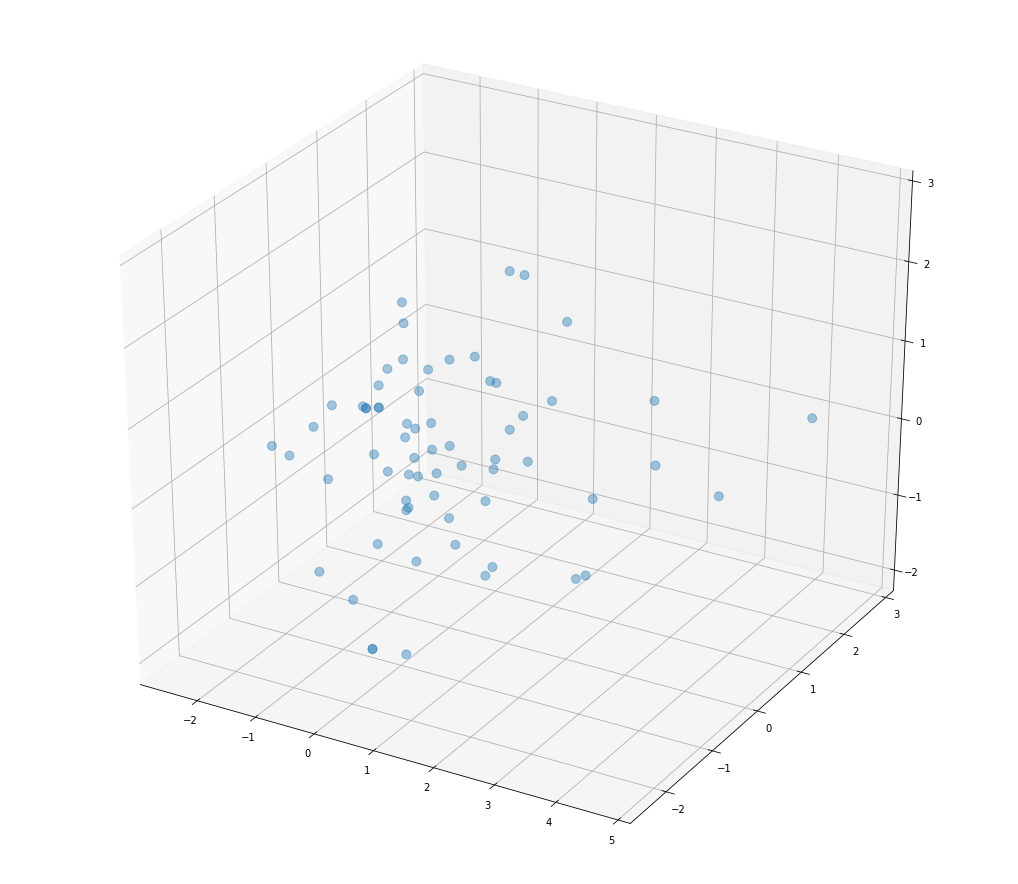

In [15]:
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principalDf.loc[:,'principal component 1'], principalDf.loc[:,'principal component 2'], principalDf.loc[:,'principal component 3'], s=80, alpha=0.4)

In [16]:
finalDf = pd.concat([principalDf, df_main[['year_study']]], axis = 1)
print(finalDf)

    principal component 1  ...  year_study
0               -1.109804  ...           3
1               -0.191787  ...           3
2                0.573378  ...           1
3               -0.117787  ...           1
4               -0.736221  ...           2
..                    ...  ...         ...
61               1.807037  ...           3
62              -0.505691  ...           2
63              -0.778811  ...           2
64              -0.360362  ...           3
65              -0.896968  ...           2

[66 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


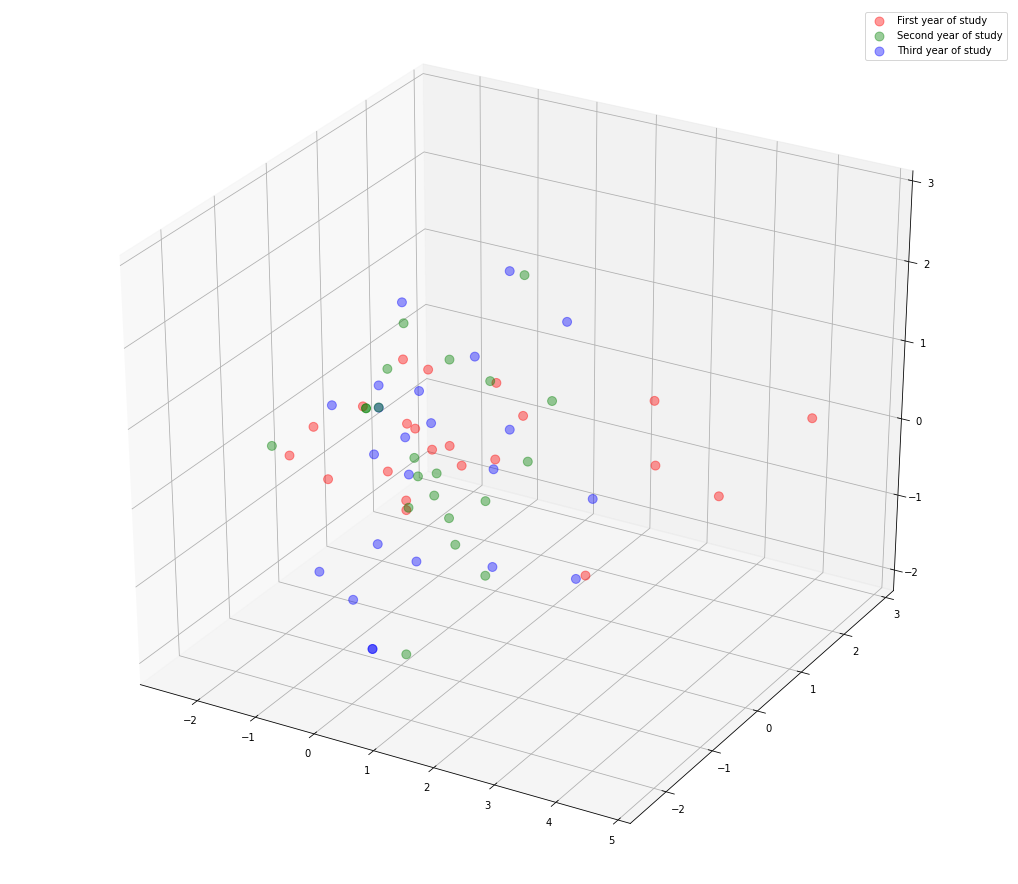

In [17]:
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111, projection='3d')

targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
  temp = finalDf.loc[finalDf['year_study'] == target]
  ax.scatter(temp.loc[:,'principal component 1']
               , temp.loc[:,'principal component 2']
               , temp.loc[:,'principal component 3']
               , c = color
               , s = 80
               , alpha=0.4)
ax.legend(targets,labels=['First year of study','Second year of study','Third year of study'])

In [18]:
finalDf = pd.concat([principalDf, df_main[['sex']]], axis = 1)
print(finalDf)

    principal component 1  principal component 2  principal component 3  sex
0               -1.109804              -0.169973              -0.135139    1
1               -0.191787              -0.646087               2.161352    0
2                0.573378               0.324058               0.874455    1
3               -0.117787               0.440848              -0.371631    1
4               -0.736221               0.073904              -0.870813    0
..                    ...                    ...                    ...  ...
61               1.807037              -1.301569              -0.469326    0
62              -0.505691               0.002046              -0.382506    0
63              -0.778811               0.970413              -1.440928    0
64              -0.360362              -0.126957               0.798393    0
65              -0.896968              -0.122183               0.977032    0

[66 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


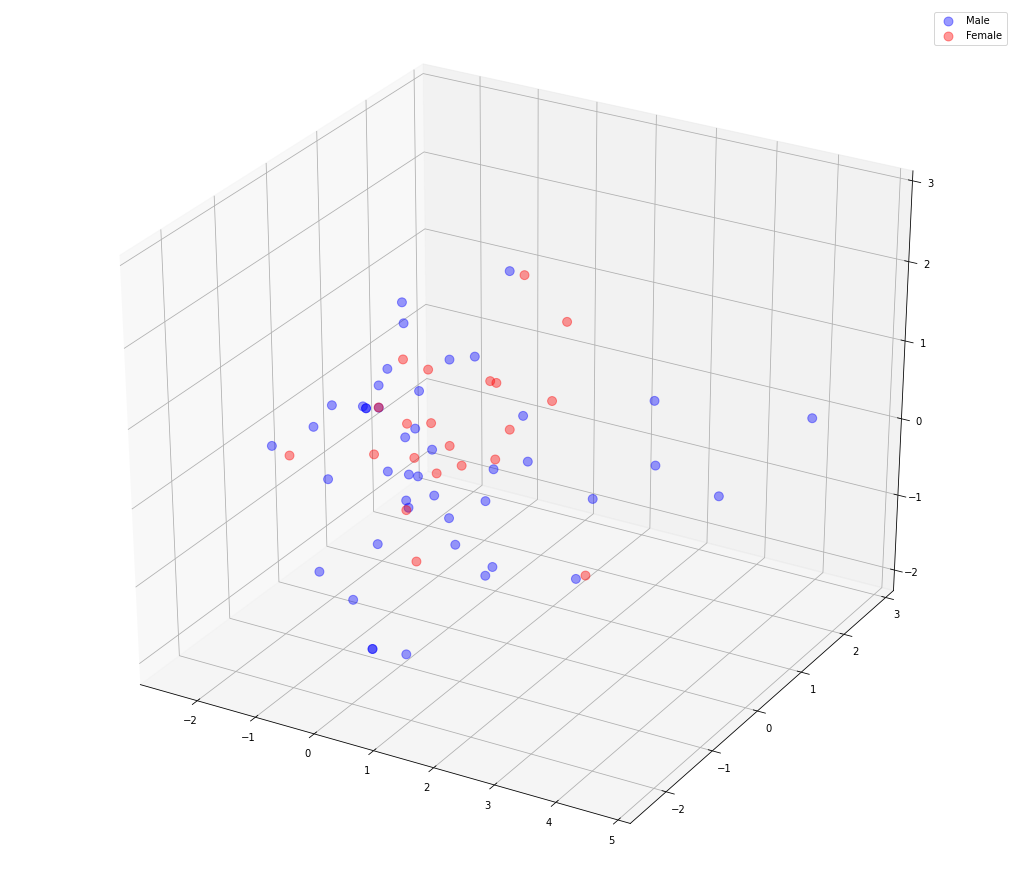

In [19]:
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111, projection='3d')

targets = [0, 1]
colors = ['b', 'r']
for target, color in zip(targets,colors):
  temp = finalDf.loc[finalDf['sex'] == target]
  ax.scatter(temp.loc[:,'principal component 1']
               , temp.loc[:,'principal component 2']
               , temp.loc[:,'principal component 3']
               , c = color
               , s = 80
               , alpha=0.4)
ax.legend(targets,labels=['Male','Female'])